In [15]:
from sklearn.utils import shuffle
import pandas as pd 
import seaborn as sns

Diamonds = shuffle(sns.load_dataset('diamonds'))


In [16]:
Diamonds.head()
Diamonds.shape
Diamonds.info() #making sure it works

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 41242 to 36363
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [17]:
X = Diamonds[['carat', 'cut', 'color', 'clarity']]#we can notice that some of these are not numerical
y = Diamonds['price']

In [18]:
X = pd.get_dummies(X, drop_first=True) #parse to numbers and remove one column to avoid creating redundancy 
X.head()#test

,carat,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
41242,0.30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5924,0.92,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
38433,0.38,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
45858,0.70,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
53655,0.76,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9123773666214793
MSE: 1390829.6385580092


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", scores)
print("Mean R2:", scores.mean())

Cross-validation R2 scores: [0.91988392 0.91445902 0.91641375 0.91825461 0.91015849]
Mean R2: 0.9158339572287023


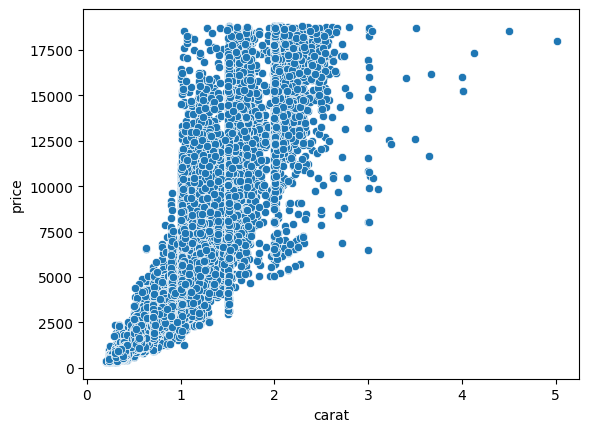

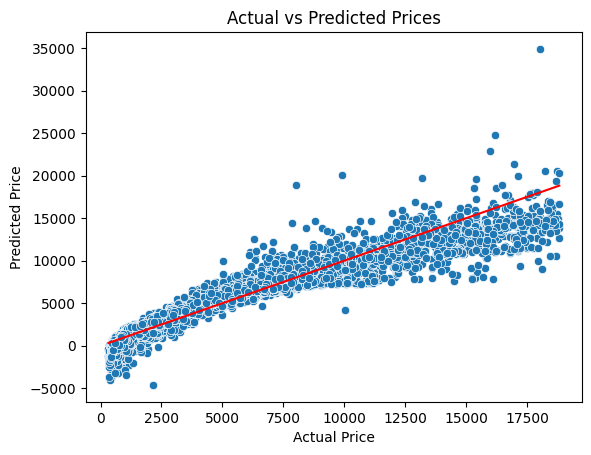

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='carat', y='price', data=Diamonds)
plt.show()

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

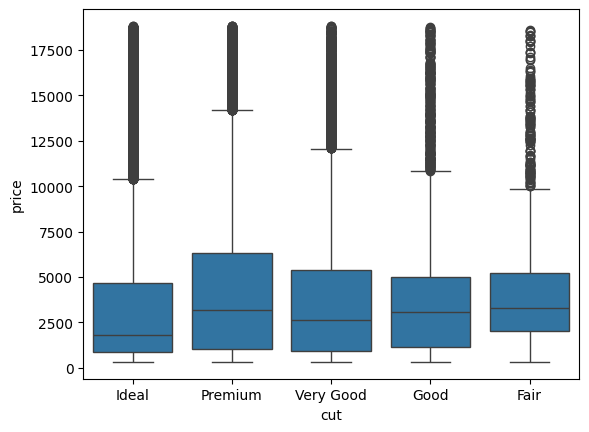

In [25]:
sns.boxplot(x='cut', y='price', data=Diamonds)
plt.show()

<Axes: xlabel='cut', ylabel='price'>

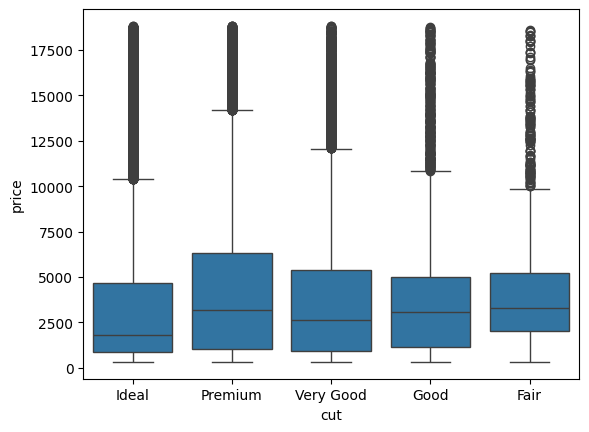

In [26]:
sns.boxplot(x='cut', y='price', data=Diamonds)

<Axes: xlabel='color', ylabel='price'>

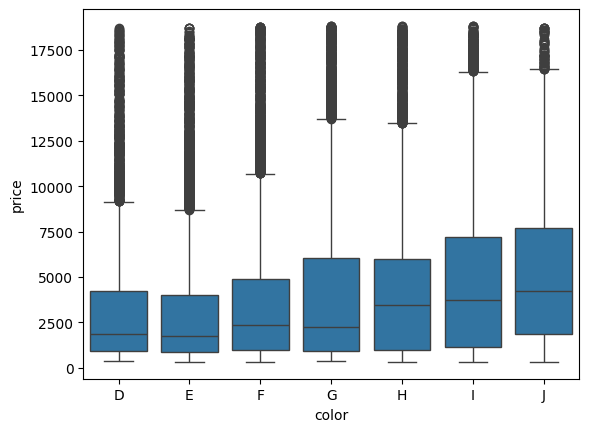

In [27]:
sns.boxplot(x='color', y='price', data=Diamonds)

"""
FINDINGS – Linear Regression Analysis

1. Model Performance:
- R² ≈ 0.91 → The model explains about 91% of the variance in price.
- MSE is large in absolute value due to price scale.
- RMSE should be interpreted relative to average price.

2. Cross-Validation:
- K-fold scores are relatively uniform → model is stable.
- Low variance across folds suggests consistent generalization.
- High mean R² + low std → good bias-variance balance.

3. Diagnostic Observations:
- Strong positive correlation between actual and predicted prices.
- Some outliers exist at high price ranges.
- Error variance increases with price (possible heteroscedasticity).
- Slight curvature may suggest mild nonlinearity.

4. Modeling Insight:
- Linear regression approximates the overall trend well.
- However, price may follow a nonlinear relationship (e.g., exponential or polynomial).
- Testing polynomial features or log transformation may improve fit.

Conclusion:
The linear model performs well overall but may benefit from nonlinear feature engineering for improved accuracy.
"""